In [1]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import sklearn.model_selection as skm
from sklearn.metrics import accuracy_score
from statsmodels.datasets import get_rdataset
from ISLP import load_data , confusion_table
from matplotlib.pyplot import subplots
from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [3]:
df = pd.read_csv('dataQTM.csv')
df = df.drop(['id', 'Unnamed: 32'], axis=1)
Diagnosis = df['diagnosis']

In [4]:
from sklearn.tree import DecisionTreeClassifier as DTC
from ISLP.models import ModelSpec as MS

In [5]:
model = MS(df.columns.drop('diagnosis'), intercept=False)
D = model.fit_transform(df)
feature_names = list(D.columns)
X = np.asarray(D)

In [7]:
#split: 70% training set and 30% testing set
(X_train, X_test, y_train, y_test) = skm.train_test_split(X, Diagnosis, test_size=0.3, random_state=123)

In [10]:
#fit the full tree on the training set with no set max_depth parameter
clf = DTC(criterion='entropy', random_state=123) 
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9415204678362573

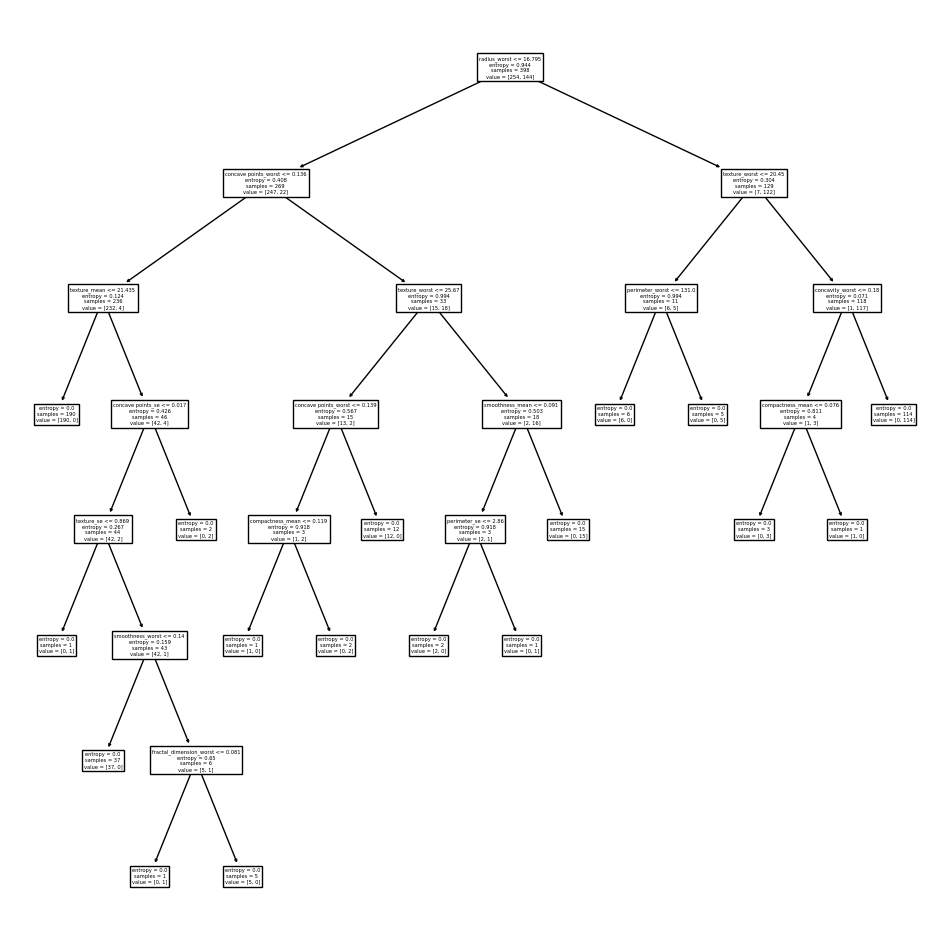

In [14]:
#generate the tree
ax = subplots(figsize=(12,12))[1] 
plot_tree(clf,
          feature_names=feature_names, 
          ax=ax);

In [15]:
#use cost_complexity_prunning_path() method of clf to extract cost-complexity values
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train) 
kfold = skm.KFold(10, random_state=123, shuffle=True)

In [16]:
#set the grid to fit the optimal parameter by cross validation
grid = skm.GridSearchCV(clf, 
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy') 
grid.fit(X_train, y_train)
grid.best_score_

0.9348717948717947

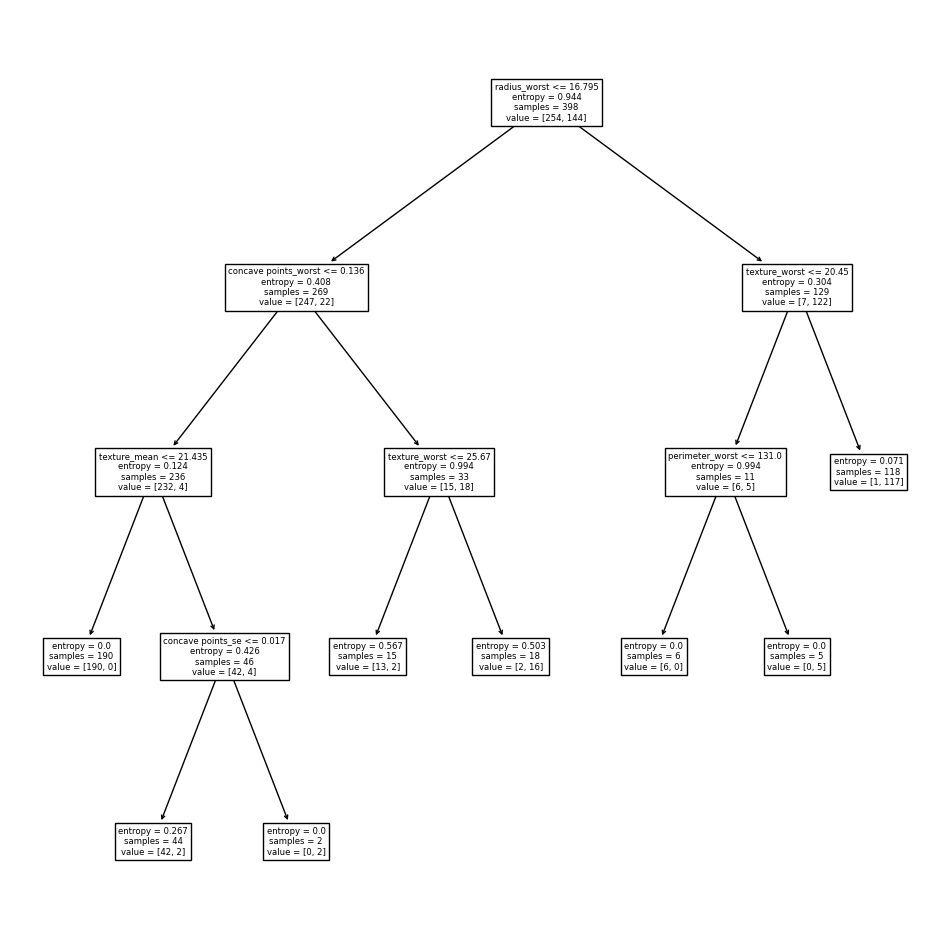

In [17]:
#generate the prunned tree
ax = subplots(figsize=(12, 12))[1] 
best_ = grid.best_estimator_ 
plot_tree(best_, 
          feature_names=feature_names, 
          ax=ax);

In [18]:
#print the confusion table
accuracy = accuracy_score(y_test, best_.predict(X_test))
confusion = confusion_table(best_.predict(X_test), 
                            y_test)
confusion

Truth,B,M
Predicted,,
B,100,6
M,3,62


In [19]:
misclassification_rate = 1 - accuracy
misclassification_rate

0.052631578947368474